# MLP Test 3

Utilizando `GridSsearchCV` para determinar melhor rede neural com **1 camada oculta** num intervalo de \[20, 145\].

## Importando bibliotecas

In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix

## Preparando dados

In [2]:
# Carregando dados
iris_dataset = load_iris()

X, y = load_iris(return_X_y=True)

# Separando dados
X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Preprocessando dados
sc = StandardScaler().fit(X_pre_train)

X_train = sc.transform(X_pre_train)
X_test = sc.transform(X_pre_test)

## Aplicando GridSearch

In [6]:
grid_search = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid={'hidden_layer_sizes':[(neurons) for neurons in range(20, 150, 5)]},
    cv=7
).fit(
    X=X_train,
    y=y_train
)

resultsDF = pd.DataFrame(grid_search.cv_results_)

resultsDF[
    [
        'split0_test_score',
        'split1_test_score',
        'split2_test_score',
        'split3_test_score',
        'split4_test_score',
        'split5_test_score',
        'split6_test_score',
        'mean_test_score',
        'std_test_score',
        'param_hidden_layer_sizes',
        'rank_test_score'
    ]
].sort_values(by=['mean_test_score', 'std_test_score', 'param_hidden_layer_sizes'], ascending=False)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,param_hidden_layer_sizes,rank_test_score
24,1.000000,1.000000,0.933333,1.000000,0.933333,0.933333,0.866667,0.952381,0.046657,140,1
18,1.000000,1.000000,0.933333,1.000000,0.933333,0.933333,0.866667,0.952381,0.046657,110,1
14,1.000000,1.000000,0.933333,0.933333,0.933333,0.933333,0.933333,0.952381,0.030117,90,1
15,0.933333,1.000000,0.933333,1.000000,0.933333,0.866667,1.000000,0.952381,0.046657,95,4
25,1.000000,1.000000,0.933333,0.933333,0.933333,0.933333,0.866667,0.942857,0.042592,145,5
22,1.000000,1.000000,0.933333,0.933333,0.933333,0.933333,0.866667,0.942857,0.042592,130,5
20,1.000000,1.000000,0.933333,0.933333,0.933333,0.933333,0.866667,0.942857,0.042592,120,5
17,0.933333,1.000000,0.933333,0.933333,0.933333,0.933333,0.933333,0.942857,0.023328,105,8
13,0.933333,1.000000,0.933333,1.000000,0.933333,0.933333,0.866667,0.942857,0.042592,85,9
10,0.933333,1.000000,0.933333,1.000000,0.933333,0.866667,0.866667,0.933333,0.050395,70,10


In [7]:
grid_search.best_params_

{'hidden_layer_sizes': 90}

## Instanciando classificador


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



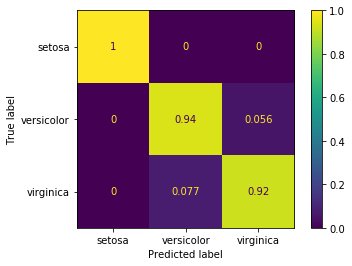

In [9]:
classifier = MLPClassifier(
    hidden_layer_sizes=(90),
    activation='tanh',
).fit(
    X_train,
    y_train
)

y_pred = classifier.predict(X_test)

plot_confusion_matrix(
    estimator=classifier,
    X=X_test,
    y_true=y_test,
    display_labels=iris_dataset.target_names,
    normalize='true'
)

print()
print(classification_report(y_test, y_pred, target_names=iris_dataset.target_names))